In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import markdown as md

_____

# Python

#### 1A. Write code to find the maximum, average and minimum price for each category of the given data with columns "Price”, "Category_SubCategory”

```markdown
Price,Category_SubCategory
234,Tops_croptop
282,Tops_croptop
222,Tops_tshirt
382,Tops_tshirt
2382,BottomWear_jeans
2212,BottomWear_jeans
1282,BottomWear_leggings
212,BottomWear_leggings
```

In [2]:
data = {
    'Price': [234, 282, 222, 382, 2382, 2212, 1282, 212],
    'Category_SubCategory': ['Tops_croptop', 'Tops_croptop', 'Tops_tshirt', 'Tops_tshirt', 
                           'BottomWear_jeans', 'BottomWear_jeans', 'BottomWear_leggings', 'BottomWear_leggings']
}

df = pd.DataFrame(data)
df

,Price,Category_SubCategory
0,234,Tops_croptop
1,282,Tops_croptop
2,222,Tops_tshirt
3,382,Tops_tshirt
4,2382,BottomWear_jeans
5,2212,BottomWear_jeans
6,1282,BottomWear_leggings
7,212,BottomWear_leggings


In [3]:
df_category = df.groupby('Category_SubCategory')['Price']

display(df_category.max())
display(df_category.min())
display(df_category.mean())

Category_SubCategory
BottomWear_jeans       2382
BottomWear_leggings    1282
Tops_croptop            282
Tops_tshirt             382
Name: Price, dtype: int64

Category_SubCategory
BottomWear_jeans       2212
BottomWear_leggings     212
Tops_croptop            234
Tops_tshirt             222
Name: Price, dtype: int64

Category_SubCategory
BottomWear_jeans       2297.0
BottomWear_leggings     747.0
Tops_croptop            258.0
Tops_tshirt             302.0
Name: Price, dtype: float64

#### 1B. Print the minimum value of 'Tops' and 'BottomWear'

In [4]:
df['Category'] = df['Category_SubCategory'].str.split('_').str[0]
df['SubCategory'] = df['Category_SubCategory'].str.split('_').str[1]
df.drop(columns=['Category_SubCategory'], inplace=True)
df

,Price,Category,SubCategory
0,234,Tops,croptop
1,282,Tops,croptop
2,222,Tops,tshirt
3,382,Tops,tshirt
4,2382,BottomWear,jeans
5,2212,BottomWear,jeans
6,1282,BottomWear,leggings
7,212,BottomWear,leggings


In [5]:
df.groupby('Category')['Price'].min()

Category
BottomWear    212
Tops          222
Name: Price, dtype: int64

#### 2. Run a Python program to do run length encoding example "abbbcdd --> a1b3c1d2"

In [6]:
inp = "bbbcddxxxxx-xxxxd"
count = 1
outp = inp[0]

for letter in inp[1:]:
    if outp[-1] == letter:
        count += 1
    else:
        outp += str(count) + letter
        count = 1
outp += str(count)

outp

'b3c1d2x5-1x4d1'

#### 3. Check if a string is palindrome or not

In [7]:
s = "Malayalam"
s = "Madam I'm Adam"
s = "Gateway to Paradise"
s = "100040001"

print(f'"{s}"')
s = ''.join([_.lower() if _.isalpha() else '' for _ in s ])

if s == s[-1::-1] and len(s) > 1:
    print("is a Palindrome")
else:
    print("is not a Palindrome")

"100040001"
is not a Palindrome


#### 4. Fix the error in the given CSV

Given a csv file with columns `time`, `category`, `price`

```markdown
time  		category 		price
12.00 		1-2-3 			23
12.40 		2-3 			25
12.45 		2                       29
13.25 		2-5-6 			29
```

Can you fix this formatting error to 
```markdown
time  		category 		price
12.00 		1 			23
12.00 		2 			23
12.00 		3 			23
12.40 		2 			25
12.40 		3 			25
12.45 		2 			29
13.25 		2 			29
13.25 		5 			29
13.25 		6 			29
```

In [8]:
data = {
    'time': [12.00, 12.40, 12.45, 13.25],
    'category': ['1-2-3', '2-3', '2', '2-5-6'],
    'price': [23, 25, 29, 29]
}

df = pd.DataFrame(data)
df

,time,category,price
0,12.00,1-2-3,23
1,12.40,2-3,25
2,12.45,2,29
3,13.25,2-5-6,29


In [9]:
df['category'] = df['category'].str.split('-')
df = df.explode('category')
df.reset_index(drop=True, inplace=True)
df

,time,category,price
0,12.00,1,23
1,12.00,2,23
2,12.00,3,23
3,12.40,2,25
4,12.40,3,25
5,12.45,2,29
6,13.25,2,29
7,13.25,5,29
8,13.25,6,29


#### 5. Write a Python program to search for an element in a 2D matrix, given that the matrix elements are arranged in sorted order in both row-wise and column-wise

```markdown
	[1 4 7 10 15]
	[3 5 8 15 19]
	[6 9 11 16 20]
	[12 19 21 26 30]
```

Note: Assume each element is unique in the matrix


In [10]:
m = [[1,4,7,10,15],[3,5,8,15,19],[6,9,11,16,20],[12,19,21,26,30]]

to_search_for = 16

i = 0; j = 0

for j in range(len(m[0])):
    if to_search_for <= m[i][j]:
        break

j -= 1

for i in range(len(m)):
    if to_search_for <= m[i][j]:
        break

i += 1

print(f"{to_search_for} is at ({i}, {j})")

16 is at (3, 3)


#### 6. Given a csv file with columns `order_id`, `price` and `user_id`, compute the sum of prices of users whose id is an odd number.

In [11]:
data = [[1, 100, 11], [2, 200, 19], [3, 300, 32], [4, 400, 47], [5, 500, 50], [6, 600, 60], [7, 700, 77], [8, 800, 81], [9, 900, 99]]

df = pd.DataFrame(data, columns=['order_id', 'price', 'user_id'])
df

,order_id,price,user_id
0,1,100,11
1,2,200,19
2,3,300,32
3,4,400,47
4,5,500,50
5,6,600,60
6,7,700,77
7,8,800,81
8,9,900,99


In [12]:
df[df['user_id'] % 2 == 1].loc[:, 'price'].sum()

3100

#### 7. Given a list of N numbers, can you sample 10 elements from them, while sampling an element at an even index with 0.4 and an element at an odd index with a probability of 0.6


#### 8. Plot a histogram of average ages of different genders across multiple cities. 

```markdown
	Age	Gender	City
	45	F	Hyd
	25	M	Hyd
	42	M	Blr
	12	F	Blr
	21	F	Kolkata
	22	M	Kolkata
```

In [13]:
data = {
    'Age': [45, 25, 42, 12, 21, 22, 43, 27],
    'Gender': ['F', 'M', 'M', 'F', 'F', 'M', 'F', 'F'],
    'City': ['Hyderabad', 'Hyderabad', 'Bangalore', 'Bangalore', 'Kolkata', 'Kolkata', 'Chennai', 'Chennai']
}
df = pd.DataFrame(data)
df = df.sort_values('City').reset_index(drop=True)
df

,Age,Gender,City
0,42,M,Bangalore
1,12,F,Bangalore
2,43,F,Chennai
3,27,F,Chennai
4,45,F,Hyderabad
5,25,M,Hyderabad
6,21,F,Kolkata
7,22,M,Kolkata


In [14]:
df_average_ages = df.groupby(['City', 'Gender'])['Age'].mean()
df_average_ages = pd.DataFrame(df_average_ages)
df_average_ages

Age
City      Gender      
Bangalore F       12.0
          M       42.0
Chennai   F       35.0
Hyderabad F       45.0
          M       25.0
Kolkata   F       21.0
          M       22.0

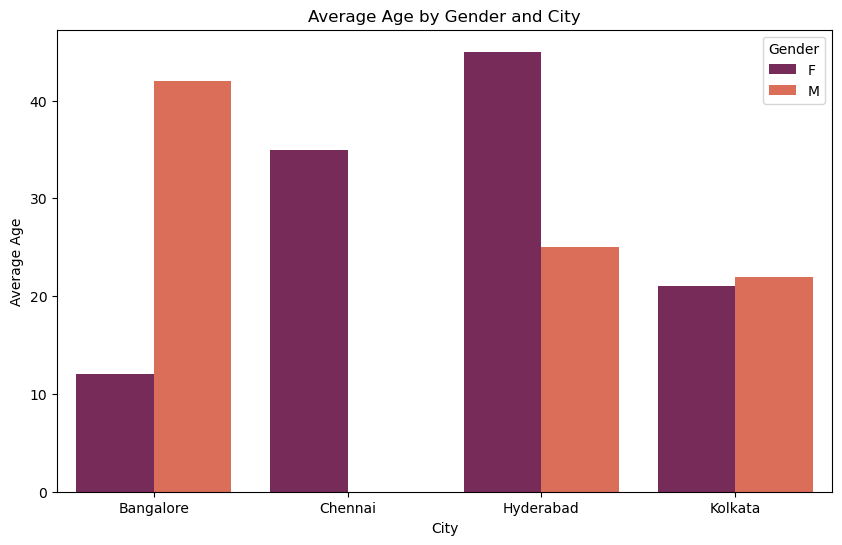

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_average_ages, x='City', y='Age', hue='Gender', palette='rocket')
plt.title('Average Age by Gender and City')
plt.ylabel('Average Age')
plt.show()

#### 9. Given a list of N elements and a number K, check if there is any sub-array whose sum is exactly K. For example:

```markdown
	A = [1, 4, 2, 7, 9, 10]  
	
	K=18 
	
	Yes, as the sum of sub array [2,7,9] is 18
```

In [16]:
A = [1, 4, 2, 7, 9, 10, 3]
K = 13
i = 0; j = 0

for i in range(len(A)):
    for j in range(i+1, len(A)+1):
        if sum(A[i:j]) == K:
            print(f"Yes, as the sum of the sub array {A[i:j]} is {sum(A[i:j])}")
            break

Yes, as the sum of the sub array [4, 2, 7] is 13
Yes, as the sum of the sub array [10, 3] is 13


#### 10. You have been given a dict with the following structure

In [17]:
d = {
    'elements_type1': {
        'element_1': [
            {'length': 200, 'width': 400, 'id': 1},
            {'length': 120, 'width': 450, 'id': 2},
            {'length': 203, 'width': 470, 'id': 3}
        ],
        'element_2': [
            {'length': 260, 'width': 405, 'id': 1},
            {'length': 178, 'width': 147, 'id': 5}
        ],
        'element_3': [
            {'length': 128, 'width': 145, 'id': 7},
            {'length': 178, 'width': 147, 'id': 2}
        ]
    },
    'elements_type2': {
        'element_1': [
            {'length': 123, 'width': 221, 'id': 6},
            {'length': 127, 'width': 415, 'id': 8},
            {'length': 203, 'width': 170, 'id': 1}
        ],
        'element_2': [
            {'length': 260, 'width': 405, 'id': 1},
            {'length': 189, 'width': 147, 'id': 15}
        ],
        'element_3': [
            {'length': 128, 'width': 375, 'id': 7},
            {'length': 108, 'width': 368, 'id': 10}
        ]
    }
}

d

{'elements_type1': {'element_1': [{'length': 200, 'width': 400, 'id': 1},
   {'length': 120, 'width': 450, 'id': 2},
   {'length': 203, 'width': 470, 'id': 3}],
  'element_2': [{'length': 260, 'width': 405, 'id': 1},
   {'length': 178, 'width': 147, 'id': 5}],
  'element_3': [{'length': 128, 'width': 145, 'id': 7},
   {'length': 178, 'width': 147, 'id': 2}]},
 'elements_type2': {'element_1': [{'length': 123, 'width': 221, 'id': 6},
   {'length': 127, 'width': 415, 'id': 8},
   {'length': 203, 'width': 170, 'id': 1}],
  'element_2': [{'length': 260, 'width': 405, 'id': 1},
   {'length': 189, 'width': 147, 'id': 15}],
  'element_3': [{'length': 128, 'width': 375, 'id': 7},
   {'length': 108, 'width': 368, 'id': 10}]}}

#### Write a program to print all the elements whose `width` is more than 400. For the above input, the output should be:

```python
elements_type1 → element_1 → 1
elements_type1 → element_1 → 2
elements_type1 → element_1 → 3
elements_type1 → element_2 → 1
elements_type2 → element_1 → 8
elements_type2 → element_2 → 1
```

In [18]:
for i in d:
    for j in d[i]:
        for k in d[i][j]:
            if k['width'] >= 400:
                print(f"{i} → {j} → {k['id']}")

elements_type1 → element_1 → 1
elements_type1 → element_1 → 2
elements_type1 → element_1 → 3
elements_type1 → element_2 → 1
elements_type2 → element_1 → 8
elements_type2 → element_2 → 1
